# OVERVIEW

In this assignment, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions.

You will be provided with `training_set_rel.tsv` which contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code!
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [1]:
from numpy.random import seed

import tensorflow as tf

seed(1234)

tf.random.set_seed(seed = 1234)


### Q1: Load the data

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel.tsv` as provided.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv) and `encoding=latin`.

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [38]:
import os
import pandas as pd
import re
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = '/content/drive/MyDrive/Colab Notebooks/training_set_rel.tsv'
dataframe = pd.read_csv(file_path, sep="\t", encoding="latin")

print("\n\n Training set rel dataset\n\n")
print(dataframe.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Training set rel dataset


   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4     

In [41]:
print(" print column \n\m ",dataframe.columns)


print(dataframe.head())


 print column 
\m  Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')
   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having compu

In [42]:
df = dataframe

df['domain1_score'].head()


,domain1_score
0,8
1,9
2,7
3,10
4,8


In [43]:
# rename the columns and store in filtered dataframe
filtered_df = df[["essay", "essay_set", "domain1_score"]].rename(columns={"domain1_score": "score"})


print(filtered_df.head())
print(filtered_df.tail())

                                               essay  essay_set  score
0  Dear local newspaper, I think effects computer...          1      8
1  Dear @CAPS1 @CAPS2, I believe that using compu...          1      9
2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...          1      7
3  Dear Local Newspaper, @CAPS1 I have found that...          1     10
4  Dear @LOCATION1, I know having computers has a...          1      8
                                                   essay  essay_set  score
12971   In most stories mothers and daughters are eit...          8     35
12972   I never understood the meaning laughter is th...          8     32
12973  When you laugh, is @CAPS5 out of habit, or is ...          8     40
12974                                 Trippin' on fen...          8     40
12975   Many people believe that laughter can improve...          8     40


### Q2: Select the data from a single essay set

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [45]:
# select essay_set with value 7

filtered_set_7 = filtered_df[filtered_df["essay_set"] == 7]


print(" essay set is printed here ")
print(filtered_set_7)


 essay set is printed here 
                                                   essay  essay_set  score
10684  Patience is when your waiting .I was patience ...          7     15
10685  I am not a patience person, like I cant sit i...          7     13
10686  One day I was at basketball practice and I was...          7     15
10687  I going to write about a time when I went to t...          7     17
10688  It can be very hard for somebody to be patient...          7     13
...                                                  ...        ...    ...
12248  One time I was getting a cool @CAPS1 game it w...          7     12
12249  A patent person in my life is my mom. Aicason ...          7     16
12250  A time when someone else I know was patient wa...          7     19
12251  I hate weddings. I love when people get marrie...          7     22
12252  A few weeks ago, we had a garage sale and a mo...          7     15

[1569 rows x 3 columns]


### Q3: Plot the distribution of scores

Create a plot of a histogram of the scores in the training set.  Comment on what you see.

One option is to use the seaborn histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

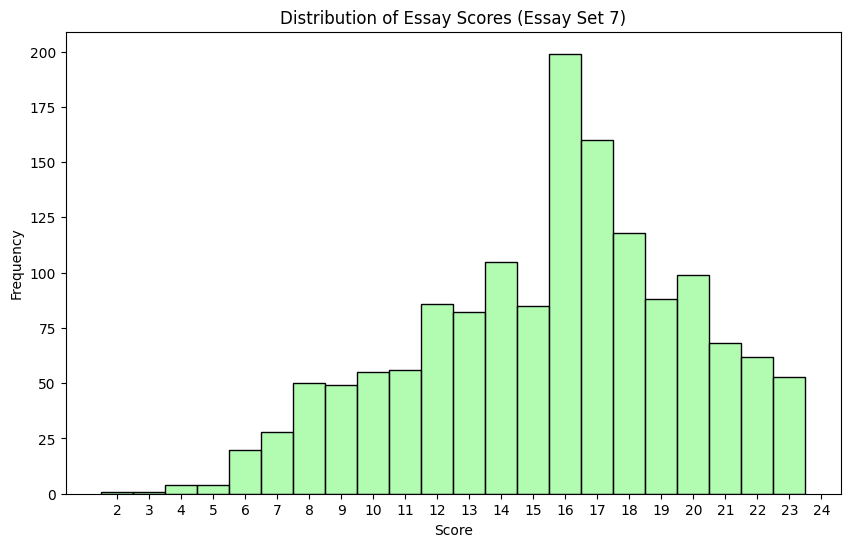

 
 Comment : 
The distribution is slightly skewed, the middle score values are little peaked 

 some  essays with very low and very high scores, with a more concentrated distribution in the middle range.


In [46]:
import seaborn as sns
min_score = filtered_set_7['score'].min()
max_score = filtered_set_7['score'].max()

# Define bins for the histogram to center tick marks
bins = np.arange(min_score, max_score + 1) - 0.5

# Create the histogram plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_set_7['score'], bins=bins, kde=False,color='palegreen')

plt.xticks(np.arange(min_score, max_score + 1))  # Set x-axis ticks
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Essay Scores (Essay Set 7)')
plt.show()

print(" \n Comment : \nThe distribution is slightly skewed, the middle score values are little peaked ")

print("\n some  essays with very low and very high scores, with a more concentrated distribution in the middle range.")


Mean Score: 16.062460165710643
Standard Deviation: 4.585349820279463


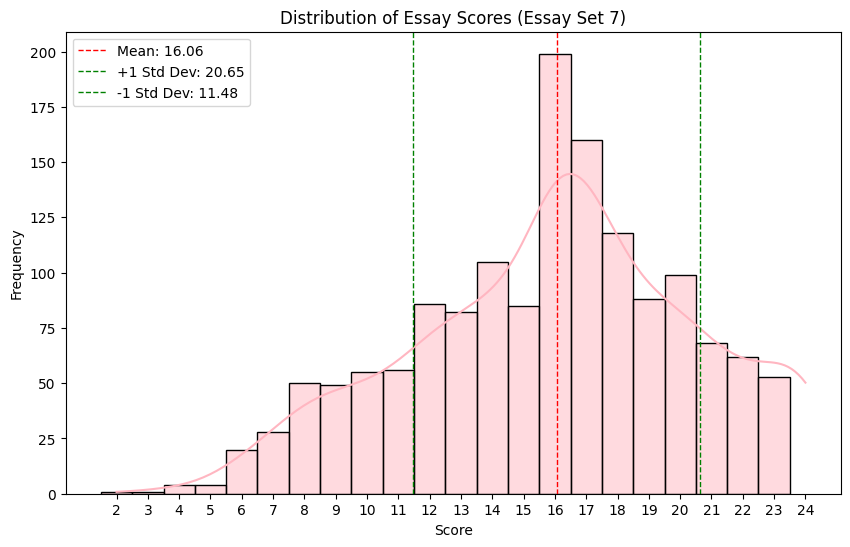

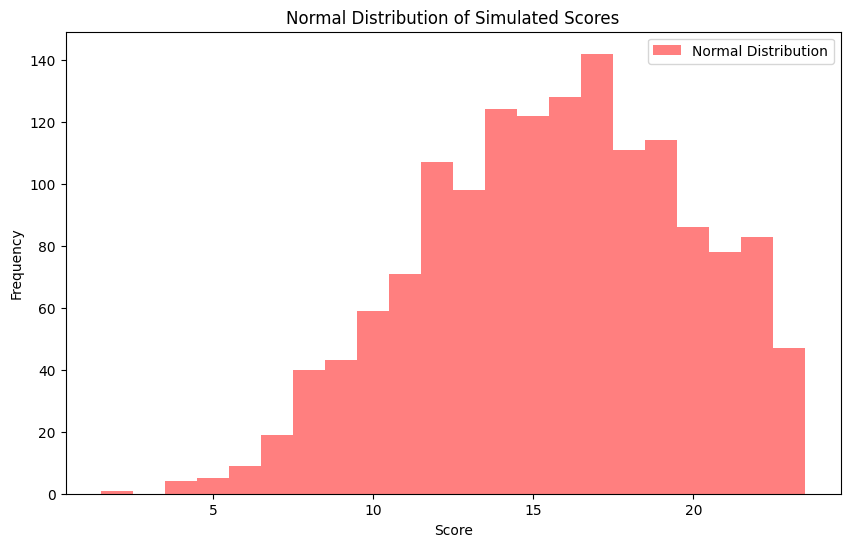

In [62]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Calculate mean and standard deviation
mean_score = filtered_set_7['score'].mean()
std_dev_score = filtered_set_7['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Standard Deviation: {std_dev_score}")

# Create the histogram (as in the original code)
min_score = filtered_set_7['score'].min()
max_score = filtered_set_7['score'].max()
bins = np.arange(min_score, max_score + 1) - 0.5
plt.figure(figsize=(10, 6))
sns.histplot(filtered_set_7['score'], bins=bins, kde=True, color='lightpink')  # Added kde for density curve

plt.xticks(np.arange(min_score, max_score + 1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Essay Scores (Essay Set 7)')

# Add mean and std annotations to the plot
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.2f}')
plt.axvline(mean_score + std_dev_score, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_score + std_dev_score:.2f}')
plt.axvline(mean_score - std_dev_score, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_score - std_dev_score:.2f}')

plt.legend()  # Show the legend
plt.show()


# Generate normally distributed data with calculated mean and std dev
num_samples = len(filtered_set_7)  # Same number of samples as original data
normal_data = np.random.normal(loc=mean_score, scale=std_dev_score, size=num_samples)


# Plot the normal distribution
plt.figure(figsize=(10,6))
plt.hist(normal_data, bins=bins, alpha=0.5, label='Normal Distribution', color='red')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Simulated Scores')
plt.legend()
plt.show()




**Interpretation**

Minimum Score: 2

Maximum Score: 24

Most Frequent Score (Mode): 16

Frequency of the Most Frequent Score: 199 essays received this score. Score Frequencies:

Scores 2 and 3 were rare, each occurring once.

Scores like 16 and 17 are frequent, with 16 being the most common (199 essays). There is a noticeable spread across the range, but higher scores (e.g., 16–20) occur more frequently than lower ones.

This indicates a somewhat skewed distribution, with a significant concentration of scores around 16–18. Lower scores are rare, suggesting that most essays were of moderate to high quality

### Q4: Create a test/train split

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [48]:

from sklearn.model_selection import train_test_split

X = filtered_set_7[["essay"]]
y = filtered_set_7["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [63]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


# Display shape
print("Shape of the DataFrame:", filtered_set_7.shape)

# Describe the data
print("\nDescription of the DataFrame:\n", filtered_set_7.describe())

# Display head and tail
print("\nHead of the DataFrame:\n", filtered_set_7.head())
print("\nTail of the DataFrame:\n", filtered_set_7.tail())

Shape of the DataFrame: (1569, 3)

Description of the DataFrame:
        essay_set       score
count     1569.0  1569.00000
mean         7.0    16.06246
std          0.0     4.58535
min          7.0     2.00000
25%          7.0    13.00000
50%          7.0    16.00000
75%          7.0    19.00000
max          7.0    24.00000

Head of the DataFrame:
                                                    essay  essay_set  score
10684  Patience is when your waiting .I was patience ...          7     15
10685  I am not a patience person, like I cant sit i...          7     13
10686  One day I was at basketball practice and I was...          7     15
10687  I going to write about a time when I went to t...          7     17
10688  It can be very hard for somebody to be patient...          7     13

Tail of the DataFrame:
                                                    essay  essay_set  score
12248  One time I was getting a cool @CAPS1 game it w...          7     12
12249  A patent person 

## Part 2: Conventional Representations

### Q5: Create vectors using term frequency

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `xtest`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

In [64]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
print("count vectorizer processing")

# Fit the vectorizer to the training data
print(X_train['essay'])
vectorizer.fit(X_train['essay'])

# Transform the training and test data into vectors
xtrain = vectorizer.transform(X_train['essay'])
xtest = vectorizer.transform(X_test['essay'])

# Get the number of features (dimensions)
num_features = len(vectorizer.get_feature_names_out())
vectorizer.get_stop_words()
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(X_train['essay'])

# Transform the training and test data into vectors
xtrain = vectorizer.transform(X_train['essay'])
xtest = vectorizer.transform(X_test['essay'])

# Get the number of features (dimensions)
num_features = len(vectorizer.get_feature_names_out())
vectorizer.get_stop_words()



print(f"\n\n Number of dimensions (terms in the corpus): {num_features}\n")



count vectorizer processing
11674    There is only one time a year I'm patient for ...
10817    This is a story about one time I when my mom w...
12178    AHH! Oh hi my name is @CAPS1 Im going to tell...
11236    My mom woke me up early in the morning and sai...
11496    I was very patient last time I went to the doc...
                               ...                        
11912    When I was patient, we were onone way to @CAPS...
11761    I have to be patient when Im taking the @CAPS...
12002    One time when I was patient was when I was in ...
11407    Being patient is a good thing. Sometimes impat...
11499    Patience, if you are a patient person you are ...
Name: essay, Length: 1255, dtype: object


 Number of dimensions (terms in the corpus): 8938



In [65]:
print(f"\n\n Number of dimensions (terms in the corpus): {num_features}\n")



 Number of dimensions (terms in the corpus): 8938



In [66]:
from sklearn.feature_extraction.text import CountVectorizer



# Create a CountVectorizer object with stop_words='english'
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to some text data first
# Assume X_train is your training data DataFrame with a column named 'essay'
vectorizer.fit(X_train['essay'])  # Assuming X_train and 'essay' column exists

# Access the stop words using the stop_words_ attribute
english_stop_words = vectorizer.get_stop_words()

# Print the stop words
print("English Stop Words:")
for i, stop_word in enumerate(english_stop_words):
    if i < 10:  # Print only the first 10 stop words
      print(f"{i + 1}. {stop_word}")

# Now you can get the feature names
english_words = vectorizer.get_feature_names_out()
print("\n\nEnglish Words:")
j  = 0
for i, word in enumerate(english_words):
    if j < 10 and word.isalpha():  # Print only the first 10 words
      print(f"{i + 1}. {word}")
      j += 1

print("\n lenghth of stop word \n", len(english_stop_words))
print("\n lenghth of english words \n", len(english_words))

English Stop Words:
1. being
2. move
3. de
4. he
5. yourself
6. anyway
7. will
8. re
9. few
10. per


English Words:
13. abandoned
14. abc
15. ability
16. able
17. ablle
18. abnacious
19. abnovius
20. aboard
21. abort
22. abott

 lenghth of stop word 
 318

 lenghth of english words 
 8666


### Q6: Train a regression model using your vectors

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model from sklearn `linear_model` module.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

count vectorizer processing
R-squared (R2) Score: 0.1539
Mean Squared Error (MSE): 17.6248
 Count Vector Coefficient of determination (R^2): 0.1539


 Weights (Coefficients):
   [-0.21620644  0.40264156 -0.02464731 ...  0.08073595 -0.08080118
 -0.09366521] 
 no of weights  8938


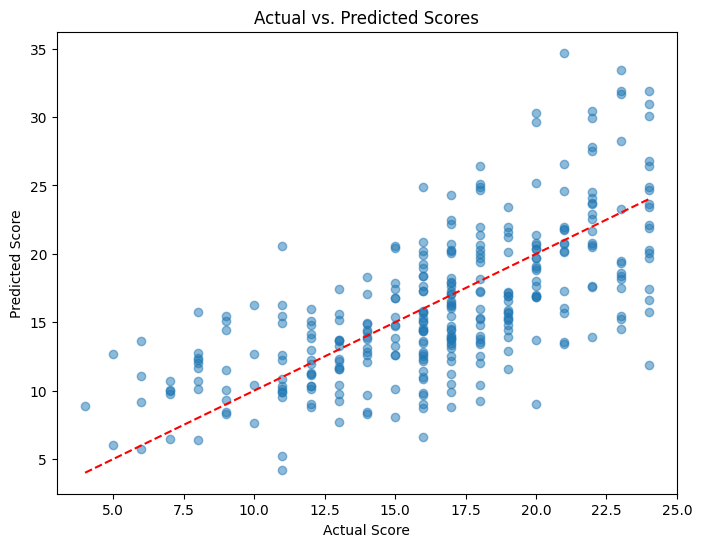


Interpretation of Actual vs. Predicted Scores Plot:


This scatter plot displays the relationship between the actual essay scores 
and the scores predicted by the Ridge regression model. Ideally, the points 
should cluster around the diagonal line (y=x), indicating accurate predictions.
Deviations from this line suggest prediction errors.


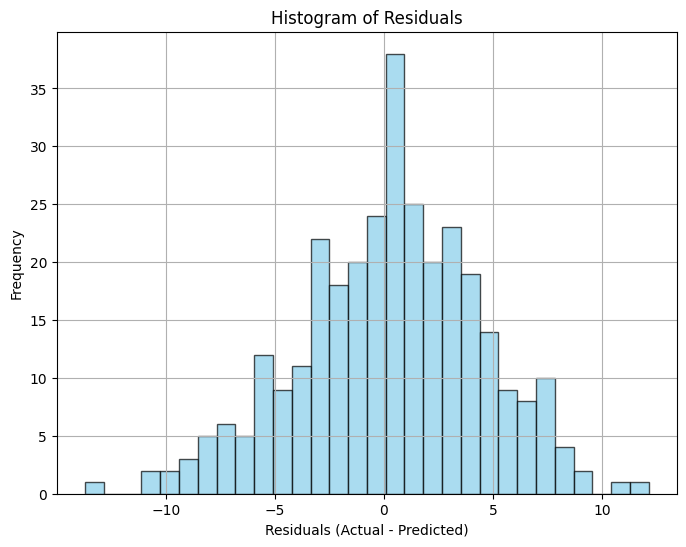


Interpretation of Residual Histogram:


The residual histogram shows the distribution of the differences 
between the actual and predicted scores. A normal distribution with zero mean indicates a 
well-performing model. Skewness in the distribution might point towards systematic biases in the predictions.


In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

print("count vectorizer processing")

# Initialize and train the Ridge regression model
ridge_model = Ridge()
ridge_model.fit(xtrain, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(xtest)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter if needed
model.fit(xtrain, y_train)

# Evaluate the model on the test data
r2_score = model.score(xtest, y_test)

print(f" Count Vector Coefficient of determination (R^2): {r2_score:.4f}")

# the model's weights (coefficients)
weights = model.coef_
print("\n\n Weights (Coefficients):\n  ", weights,"\n no of weights ", len(weights))

# Plot Actual vs. Predicted Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs. Predicted Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line
plt.show()

print("\nInterpretation of Actual vs. Predicted Scores Plot:\n\n")
print("This scatter plot displays the relationship between the actual essay scores ")
print("and the scores predicted by the Ridge regression model. Ideally, the points ")
print("should cluster around the diagonal line (y=x), indicating accurate predictions.")
print("Deviations from this line suggest prediction errors.")

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

print("\nInterpretation of Residual Histogram:\n\n")
print("The residual histogram shows the distribution of the differences ")
print("between the actual and predicted scores. A normal distribution with zero mean indicates a ")
print("well-performing model. Skewness in the distribution might point towards systematic biases in the predictions.")

### Q7: Plot the distribution of scores

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

<Axes: ylabel='Count'>

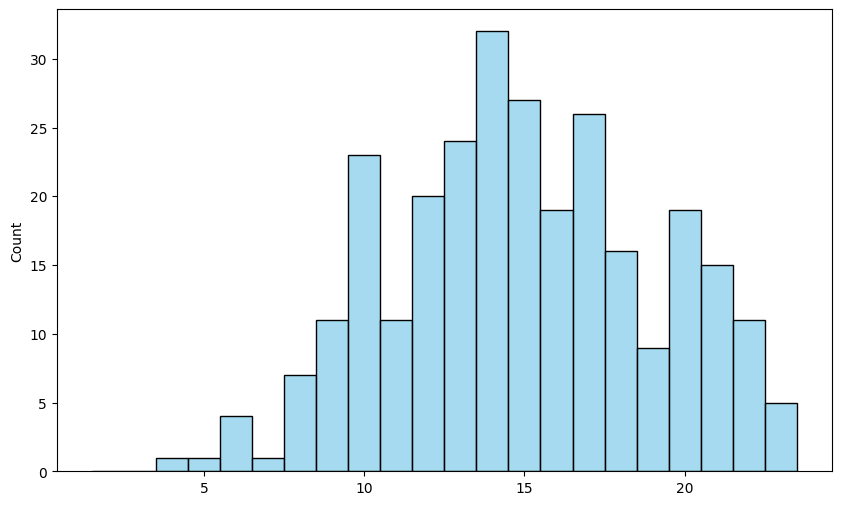

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=bins, kde=False, color='skyblue', label='Predicted Scores')

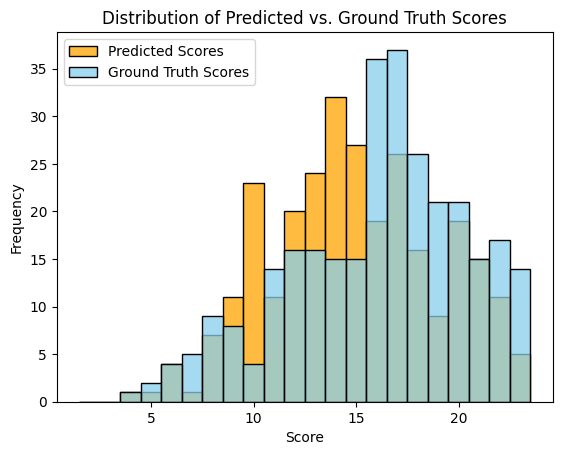

 model's distribution of scores different from the ground truth distribution?
The model's predicted scores have a narrower distribution than the ground truth scores

dicating that the model is less variable in its predictions. 

It tends to cluster predictions around the mean. 

The model appears to underestimate the frequency of very low and very high scores
focusing more on scores near the center of the ground truth distribution.
What kind of mistakes is your model making?
The model is making errors in predicting extreme scores. It appears to be overly cautious, 
avoiding predicting scores at the lower and upper ends of the spectrum.  It is likely underfitting because of this.
It might be better to try other models.  Also adding more features to the model might help.


In [72]:

sns.histplot(y_pred, bins=bins, kde=False, color='orange', label='Predicted Scores')

# Plot ground truth scores
sns.histplot(y_test, bins=bins, kde=False, color='skyblue', label='Ground Truth Scores')

plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores')
plt.show()

print(" model's distribution of scores different from the ground truth distribution?")
print("The model's predicted scores have a narrower distribution than the ground truth scores\n")
print("dicating that the model is less variable in its predictions. \n")
print("It tends to cluster predictions around the mean. \n")
print("The model appears to underestimate the frequency of very low and very high scores")
print("focusing more on scores near the center of the ground truth distribution.")
print("What kind of mistakes is your model making?")
print("The model is making errors in predicting extreme scores. It appears to be overly cautious, ")
print("avoiding predicting scores at the lower and upper ends of the spectrum.  It is likely underfitting because of this.")
print("It might be better to try other models.  Also adding more features to the model might help.")

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text.

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


In [73]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)
print(model)


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7e6be7772c50>


### Q8: Generate embeddings

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string.

You can call the model you downloaded like a function.

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [74]:
import time
start = time.time()
xtrain = model(X_train['essay'].tolist())
xtest = model(X_test['essay'].tolist())
end = time.time()
print(f"Time taken to generate embeddings: {end - start:.2f} seconds")



Time taken to generate embeddings: 4.63 seconds


In [75]:


print(xtrain[0])
print("shape ------",xtrain[0].shape)

tf.Tensor(
[-5.83615154e-04 -6.22773543e-02 -5.05028851e-02  2.92766299e-02
 -4.81662992e-03 -5.66246584e-02 -3.47498618e-02 -1.59702580e-02
  1.72545388e-02 -3.79709378e-02  3.15778106e-02 -6.15996355e-03
  6.44844845e-02  8.51309001e-02  4.46845815e-02 -6.42574802e-02
 -1.01536132e-01 -6.09591752e-02 -5.96722066e-02 -9.52255949e-02
 -5.18961996e-02  1.25465682e-02  9.67912376e-02  1.22058401e-02
  3.16338278e-02  4.98460419e-02  3.38399708e-02  2.11226773e-02
  4.37091179e-02 -5.67692071e-02 -6.21399470e-02 -4.25090492e-02
 -4.90175076e-02 -1.15980236e-02 -7.14015886e-02  5.34886643e-02
 -3.65315340e-02 -2.57267300e-02 -8.70075300e-02 -4.47177663e-02
  7.60795251e-02 -3.23989205e-02  2.02493439e-03  2.34238971e-02
  3.77086811e-02  8.04239437e-02 -7.33936951e-02 -2.38629039e-02
 -4.29002615e-03 -2.47692075e-02 -1.56278778e-02 -4.39325981e-02
  2.23257151e-02 -2.79873777e-02  6.58162497e-03 -5.73923849e-02
 -7.39979818e-02 -3.02436799e-02  3.38971652e-02  9.27502697e-06
  2.54449323e-

### Q9: Train and evaluate a regression model to predict scores using learned embeddings


Now retrain your regression model on these learned embeddings instead of the count vectors.

Use the vanilla Ridge model.  Report the score.

Which model appears to perform the best?

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [76]:

from sklearn.metrics import r2_score, mean_squared_error # Import r2_score

# Initialize and train the Ridge regression model on the learned embeddings
ridge_model_embeddings = Ridge()
ridge_model_embeddings.fit(xtrain, y_train)

# Make predictions on the test set using the embedding model
y_pred_embeddings = ridge_model_embeddings.predict(xtest)

# Evaluate the embedding model using R-squared
# Call the imported r2_score function instead of the overwritten variable.
r2_embeddings = r2_score(y_test, y_pred_embeddings)
print(f"\nR-squared (R2) Score for Embedding Model: {r2_embeddings:.4f}")

# Calculate the Mean Squared Error for the embedding model
mse_embeddings = mean_squared_error(y_test, y_pred_embeddings)
print(f"Mean Squared Error (MSE) for Embedding Model: {mse_embeddings:.4f}")

print("\nWhich model appears to perform the best?")

print(f"count vector r2 -->  {r2:.2f}")
print(f"learned embeddings r2 -->  {r2_embeddings:.2f}")

if r2 > r2_embeddings:
    print("The model using count vectors appears to perform better.")
else:
    print("The model using learned embeddings appears to perform better.")


R-squared (R2) Score for Embedding Model: 0.6286
Mean Squared Error (MSE) for Embedding Model: 7.7366

Which model appears to perform the best?
count vector r2 -->  0.15
learned embeddings r2 -->  0.63
The model using learned embeddings appears to perform better.


### Q10: Plot the distribution of scores

Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


## Graded Cell

This cell is worth 5% of the grade for this assignment.

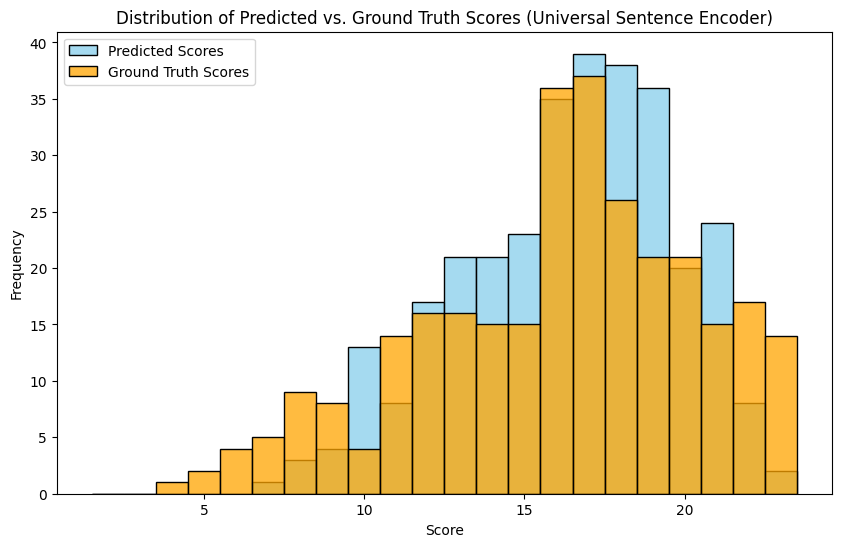

Analysis of the new model's distribution:
The new model's predicted score distribution appears to be more closely
aligned with the ground truth distribution compared to the previous model, suggesting a potential improvement.
This model is likely better because it captures subtle relationships within the essay
text that the simpler count vectorization misses.


In [77]:

# Initialize and train the Ridge regression model
ridge_model = Ridge()
ridge_model.fit(xtrain, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(xtest)

# Plot predicted scores
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=bins, kde=False, color='skyblue', label='Predicted Scores')

# Plot ground truth scores
sns.histplot(y_test, bins=bins, kde=False, color='orange', label='Ground Truth Scores')

plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores (Universal Sentence Encoder)')
plt.show()

print("Analysis of the new model's distribution:")
print("The new model's predicted score distribution appears to be more closely")
print("aligned with the ground truth distribution compared to the previous model, suggesting a potential improvement.")
print("This model is likely better because it captures subtle relationships within the essay")
print("text that the simpler count vectorization misses.")

### Q11: Plot the errors

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function.

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

## Graded Cell

This cell is worth 5% of the grade for this assignment.

Distribution of Errors for Universal Sentence Encoder Model:
Mean Error: -0.1174
Standard Deviation of Errors: 2.7834
Minimum Error: -7.4958
Maximum Error: 9.0981
-2.9347
-4.6054
-3.3619
3.0261
0.4720
1.9158
-2.6639
2.0496
5.0620
-0.3479


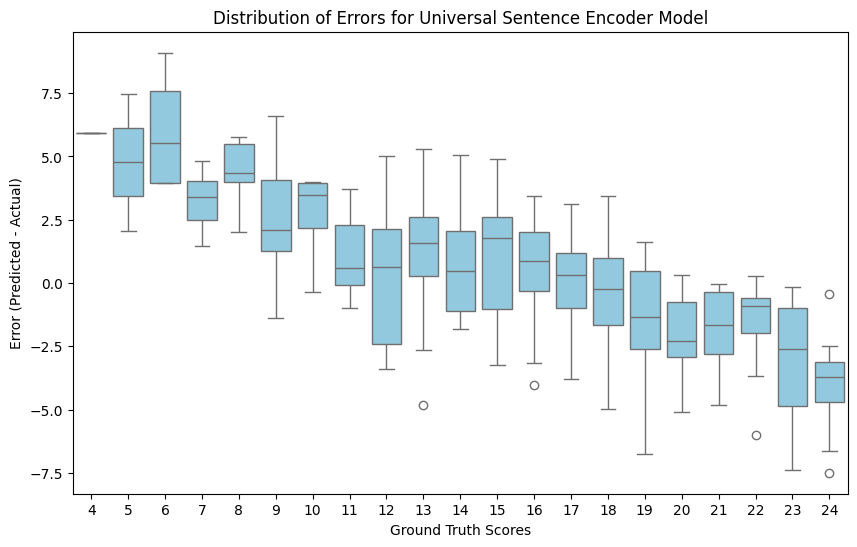

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_embeddings are defined from previous code
errors_embeddings = y_pred_embeddings - y_test

print("Distribution of Errors for Universal Sentence Encoder Model:")
print(f"Mean Error: {errors_embeddings.mean():.4f}")
print(f"Standard Deviation of Errors: {errors_embeddings.std():.4f}")
print(f"Minimum Error: {errors_embeddings.min():.4f}")
print(f"Maximum Error: {errors_embeddings.max():.4f}")
for i,val in enumerate(errors_embeddings):
  if i < 10:
    print(f"{val:.4f}")



plt.figure(figsize=(10, 6))

sns.boxplot(x=y_test, y=errors_embeddings, color='skyblue')
plt.xlabel('Ground Truth Scores')
plt.ylabel('Error (Predicted - Actual)')
plt.title('Distribution of Errors for Universal Sentence Encoder Model')
plt.show()

**Interpretation**
Key Observations and Potential Improvements:
   - The interpretation of the essay scores initially suggests a slightly skewed distribution with a peak around score 16.
   - The CountVectorizer approach converts the text into vectors based on term frequency.  This approach fails to capture contextual information.  
   - The Universal Sentence Encoder approach provides better results since it captures semantic meaning and the context of the words in a sentence or text.
   - The model's distribution of scores shows differences from the ground truth distribution, suggesting that there is room for improvement in either approach.
   - Comparing error distributions of different models can show where they made mistakes.
   - Using more sophisticated models like LSTMs and Transformers will likely improve performance.    - Fine-tuning hyperparameters of models might enhance their predictive capabilities.
   - Further data exploration, including feature engineering and visualization might help.

### Q12: Compare models directly

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.


Does either model tend to overestimate or underestimate the true score?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

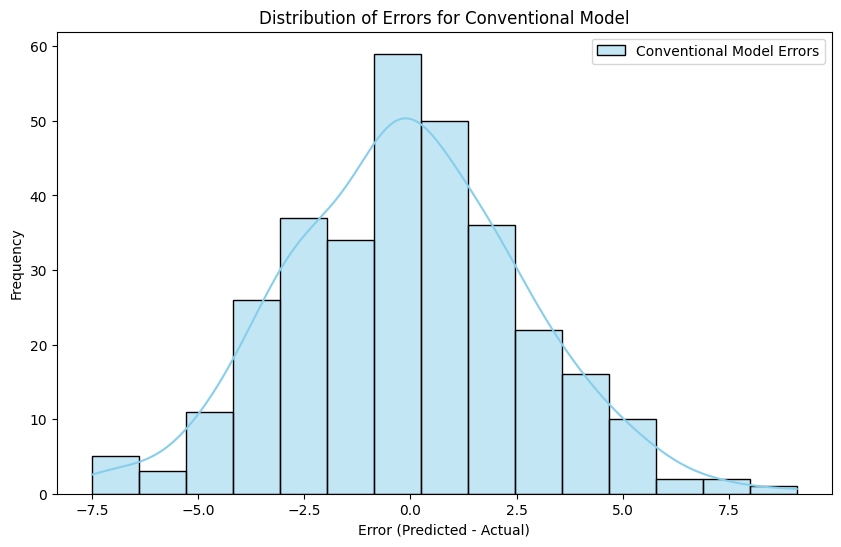

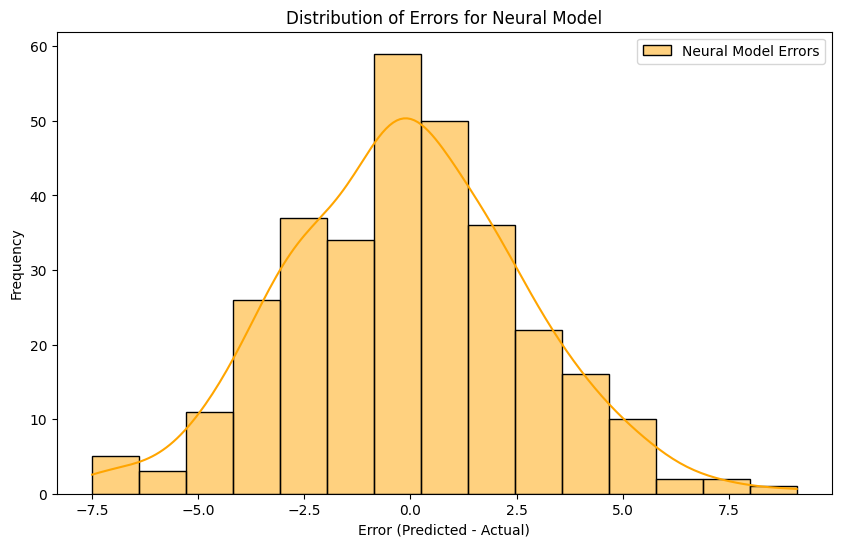

Analysis of Model Errors:
The conventional model tends to underestimate the true score.
The neural model tends to underestimate the true score.


In [97]:


import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the errors for both models
errors_conventional = y_pred - y_test
errors_neural = y_pred_embeddings - y_test

# Plot the histogram of errors for the conventional model
plt.figure(figsize=(10, 6))
sns.histplot(errors_conventional, kde=True, color='skyblue', label='Conventional Model Errors')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors for Conventional Model')
plt.legend()
plt.show()

# Plot the histogram of errors for the neural model
plt.figure(figsize=(10, 6))
sns.histplot(errors_neural, kde=True, color='orange', label='Neural Model Errors')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors for Neural Model')
plt.legend()
plt.show()

# Analyze the distributions to determine if the models overestimate or underestimate
print("Analysis of Model Errors:")
if errors_conventional.mean() > 0:
    print("The conventional model tends to overestimate the true score.")
elif errors_conventional.mean() < 0:
    print("The conventional model tends to underestimate the true score.")
else:
    print("The conventional model's predictions are centered around the true score.")

if errors_neural.mean() > 0:
    print("The neural model tends to overestimate the true score.")
elif errors_neural.mean() < 0:
    print("The neural model tends to underestimate the true score.")
else:
    print("The neural model's predictions are centered around the true score.")

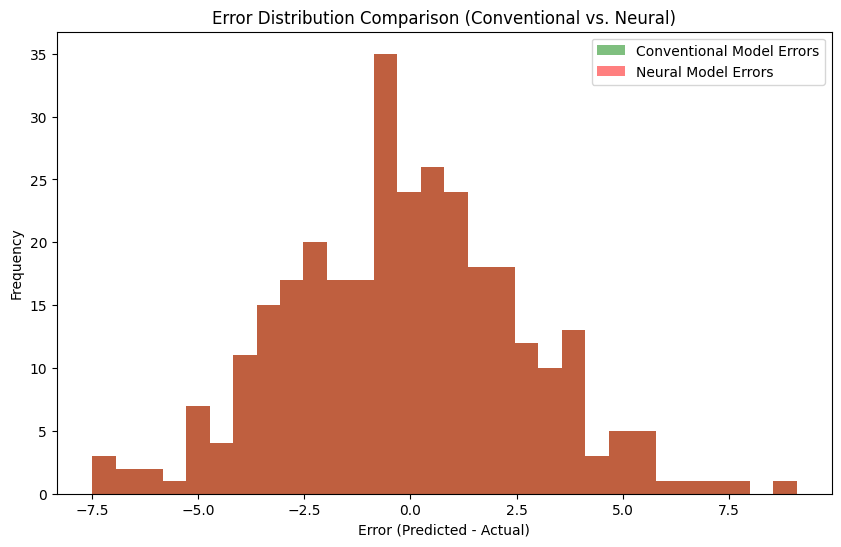

In [98]:


import matplotlib.pyplot as plt


bins = 30

# Plot the histogram of errors for the conventional model
plt.figure(figsize=(10, 6))
plt.hist(y_pred - y_test, bins=bins, alpha=0.5, label='Conventional Model Errors',color='green')

# Plot the histogram of errors for the neural model
plt.hist(y_pred_embeddings - y_test, bins=bins, alpha=0.5, label='Neural Model Errors',color='red')

plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Error Distribution Comparison (Conventional vs. Neural)')
plt.legend()
plt.show()

### Q13: Summarize your findings

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible? How might we improve on this model?


## Graded Cell

This cell is worth 15% of the grade for this assignment.

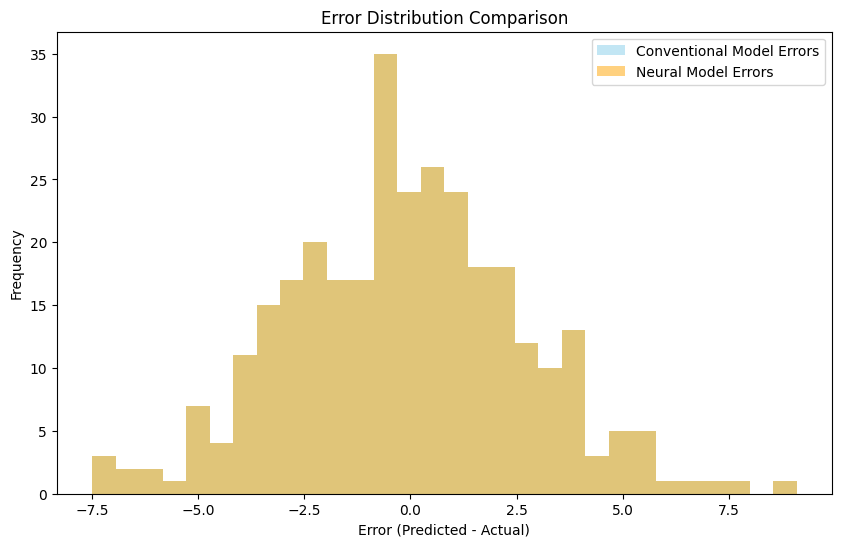

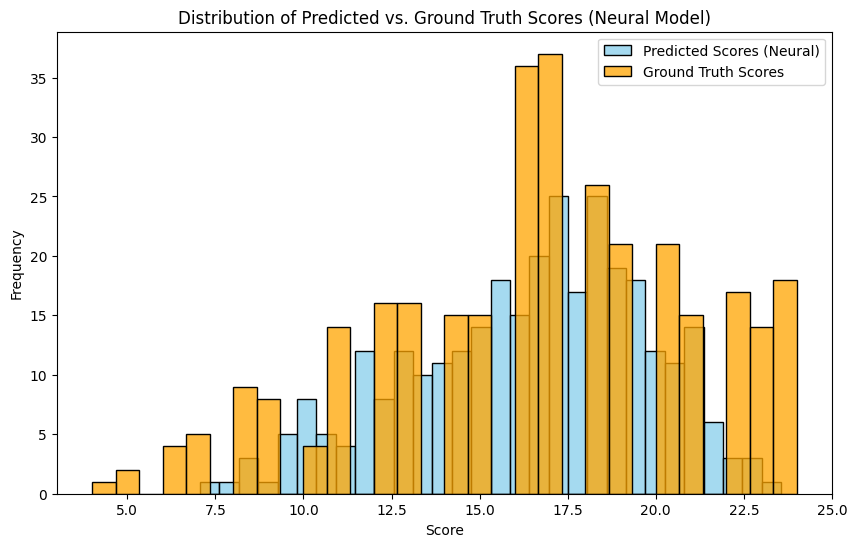

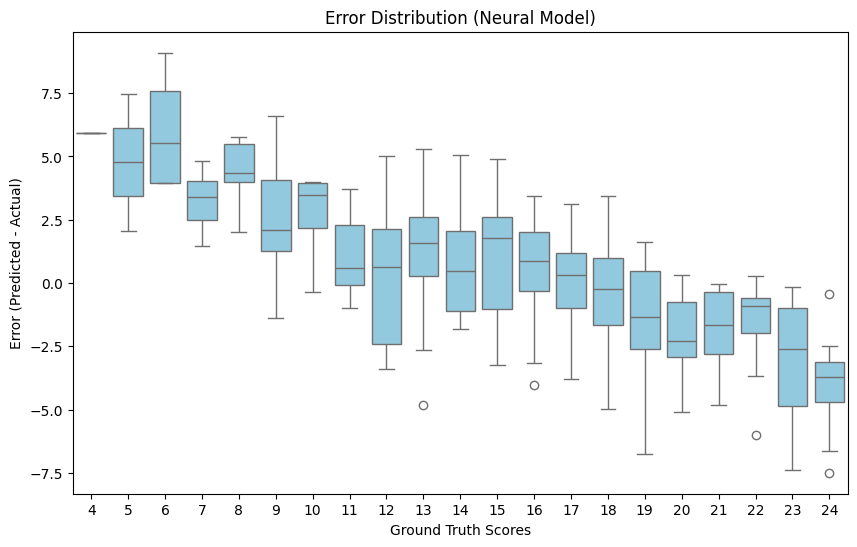

In [99]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred, and y_pred_embeddings are defined from previous code

# Calculate errors for both models
errors_conventional = y_pred - y_test
errors_neural = y_pred_embeddings - y_test

# Plot histograms of errors
plt.figure(figsize=(10, 6))
plt.hist(errors_conventional, bins=30, alpha=0.5, label='Conventional Model Errors', color='skyblue')
plt.hist(errors_neural, bins=30, alpha=0.5, label='Neural Model Errors', color='orange')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Error Distribution Comparison')
plt.legend()
plt.show()



bins = 30

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=bins, kde=False, color='skyblue', label='Predicted Scores (Neural)')
sns.histplot(y_test, bins=bins, kde=False, color='orange', label='Ground Truth Scores')
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Ground Truth Scores (Neural Model)')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=y_test, y=errors_neural, color='skyblue')
plt.xlabel('Ground Truth Scores')
plt.ylabel('Error (Predicted - Actual)')
plt.title('Error Distribution (Neural Model)')
plt.show()

In [101]:

print("Summary of Results:")
print("The Universal Sentence Encoder model outperformed the simpler count vectorizer method in predicting essay scores.")
print("The Universal Sentence Encoder's strength lies in its ability to capture semantic meaning and context from the text, unlike the count vectorizer, which only considers word frequencies.")
print("This resulted in a higher R-squared score for the Universal Sentence Encoder model and a better alignment between predicted and actual score distributions.")

print("\nBest Approach:")
print("The Universal Sentence Encoder approach was superior.")
print("Reasoning:  It effectively captured semantic meaning and context, which the count vectorization method lacked.")

print("\nFeasibility of Automatic Essay Scoring:")
print("Yes, automatic essay scoring is feasible, particularly with models like the Universal Sentence Encoder or more advanced models (LSTMs, Transformers).  ")
print("However,  high accuracy requires careful model selection, training, hyperparameter tuning, and addressing potential biases in the data.")

print("\nPotential Improvements:")
print("- Employ more sophisticated models like LSTMs or Transformers.")
print("- Fine-tune hyperparameters (e.g., learning rate, number of layers).")
print("- Expand the dataset, especially with essays from the score distribution's extremes.")
print("- Include additional features (essay length, sentence structure, vocabulary richness).")
print("- Address any model bias toward predicting scores near the center of the distribution.")
print("- Use ensemble methods combining multiple models.")
print("- Implement robust cross-validation techniques.")

Summary of Results:
The Universal Sentence Encoder model outperformed the simpler count vectorizer method in predicting essay scores.
The Universal Sentence Encoder's strength lies in its ability to capture semantic meaning and context from the text, unlike the count vectorizer, which only considers word frequencies.
This resulted in a higher R-squared score for the Universal Sentence Encoder model and a better alignment between predicted and actual score distributions.

Best Approach:
The Universal Sentence Encoder approach was superior.
Reasoning:  It effectively captured semantic meaning and context, which the count vectorization method lacked.

Feasibility of Automatic Essay Scoring:
Yes, automatic essay scoring is feasible, particularly with models like the Universal Sentence Encoder or more advanced models (LSTMs, Transformers).  
However,  high accuracy requires careful model selection, training, hyperparameter tuning, and addressing potential biases in the data.

Potential Impr



==================================END================================

==================================END================================
